# Importing Libraries

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")

# Reading Data

In [70]:
train = pd.read_csv(r"D:\Data Science Course\Projects\Analytics vidya\Cross Sales Prediction\train.csv")
test = pd.read_csv(r"D:\Data Science Course\Projects\Analytics vidya\Cross Sales Prediction\test.csv")
sample_sub = pd.read_csv(r"D:\Data Science Course\Projects\Analytics vidya\Cross Sales Prediction\sample_submission.csv")

In [71]:
print('Shape of train: {}'.format(train.shape))
print('Shape of test: {}'.format(test.shape))

Shape of train: (381109, 12)
Shape of test: (127037, 11)


In [72]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


# Data Dictionary


id:	Unique ID for the customer

Gender:	Gender of the customer

Age: Age of the customer

Driving_License: 	0 : Customer does not have DL, 1 : Customer already has DL

Region_Code:	Unique code for the region of the customer

Previously_Insured: 	1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

Vehicle_Age: 	Age of the Vehicle 

Vehicle_Damage: 
1 : Customer got his/her vehicle damaged in the past.
0 : Customer didn't get his/her vehicle damaged in the past.

Annual_Premium: The amount customer needs to pay as premium in the year

Policy_Sales_Channel:	Anonymised Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

Vintage:	Number of Days, Customer has been associated with the company

Response:	1 :  Customer is interested, 0 : Customer is not interested

## Encoding Target variable

In [73]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [74]:
train['Response'] = le.fit_transform(train['Response'])

---
# Exploratory Data Analysis

# Bias Checking

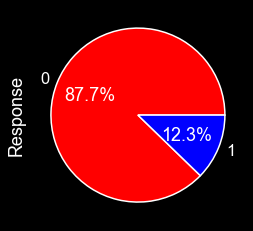

In [75]:
train['Response'].value_counts().plot.pie(autopct = '%1.1f%%',colors=['Red','Blue'])

## <font color = 'Red'> Data is Imbalanced. Only 12.3% of customers are likely to buy insuarance. </font>

### Missing Value Analysis

In [76]:
train.isna().sum().sum(),# test.isna().sum().sum() 

(0,)

There are no missing values in dataset

# Analysing Each Variable's Relationship with Target Variable

## 1.  `Gender`

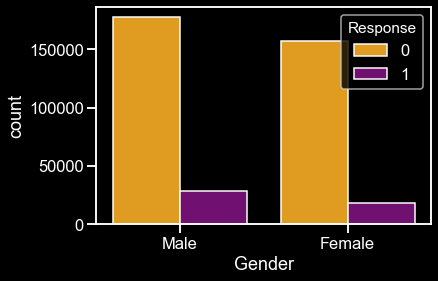

In [77]:
sns.countplot(train['Gender'], hue = train['Response'],palette=['Orange','Purple'])

## 2. `Age`

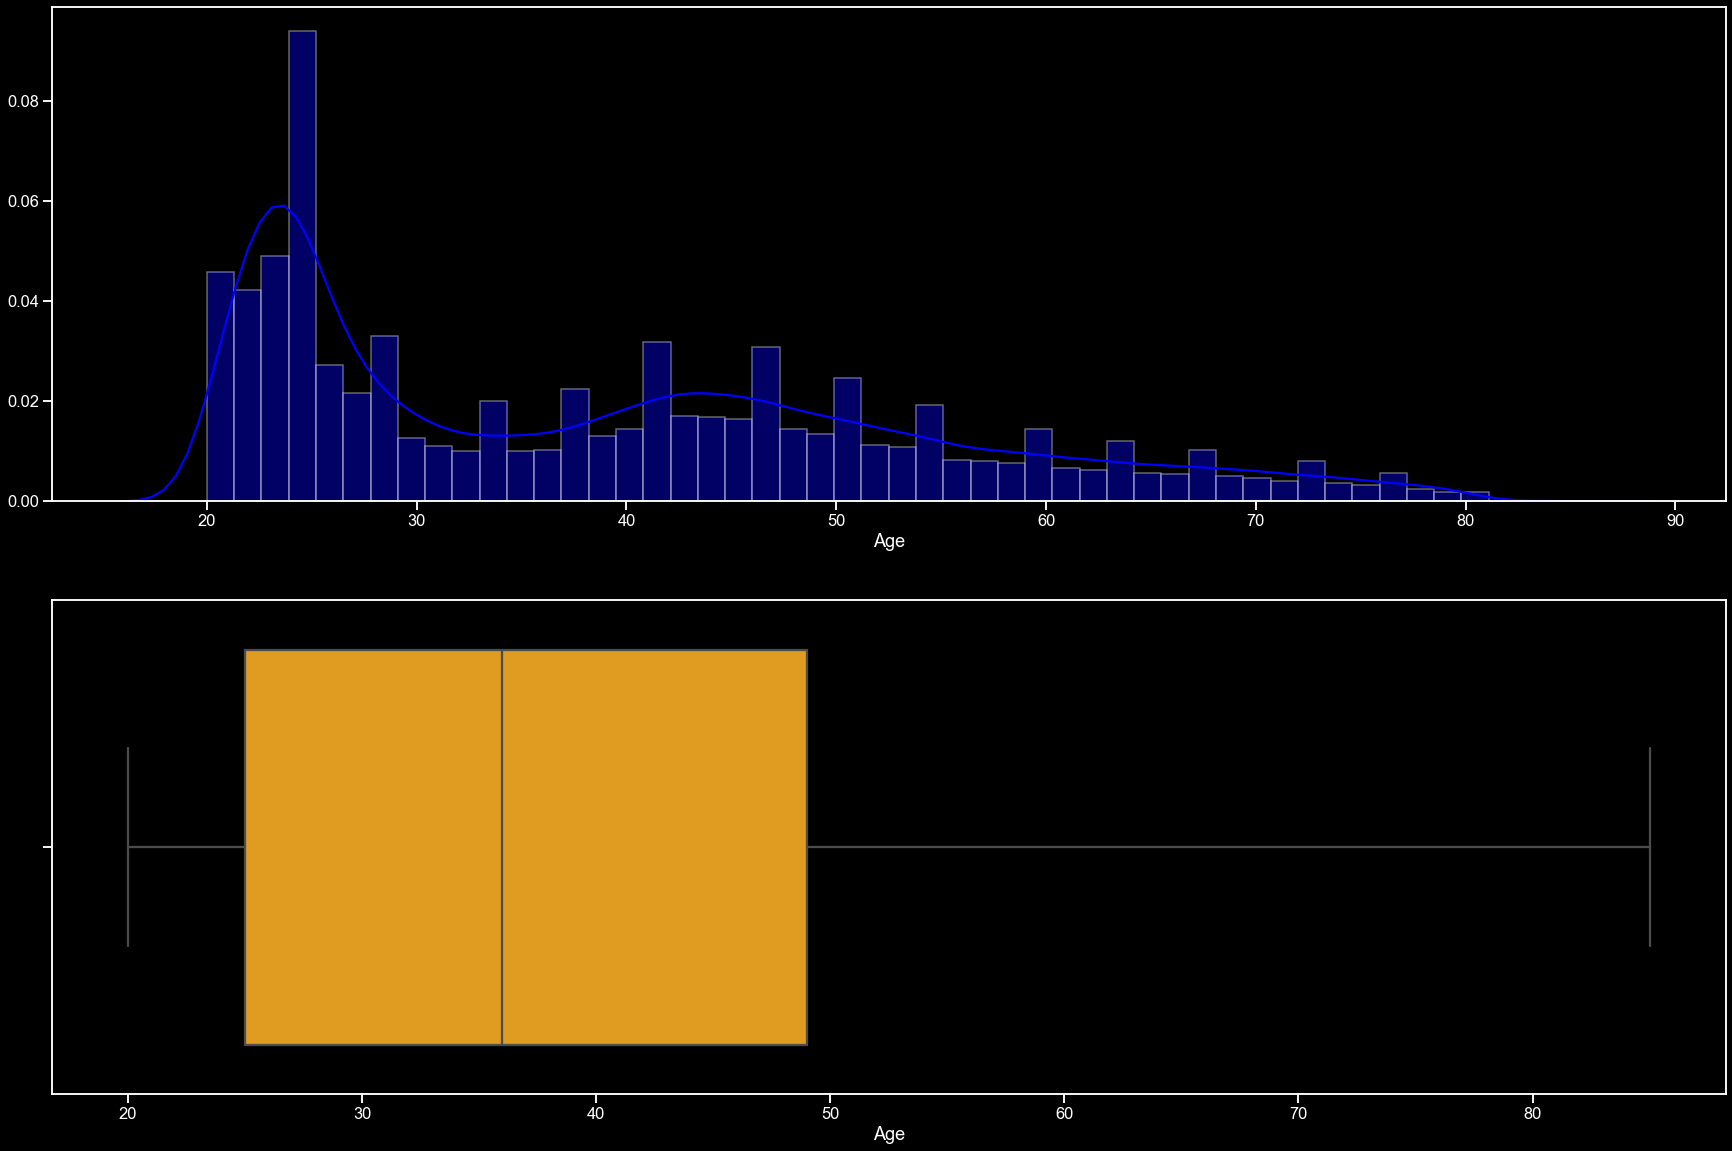

In [78]:
f,ax = plt.subplots(nrows=2,ncols=1,figsize=(30,20))
axx = ax.flatten()
#plt.figure(figsize=(30,10))
sns.distplot(train['Age'],ax=axx[0], color='Blue')
sns.boxplot(train['Age'],ax=axx[1],color='Orange')
# Gaussian Mixture Models

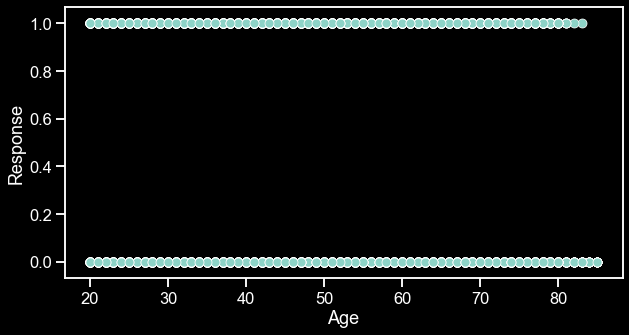

In [79]:
plt.figure(figsize=(10,5))
sns.scatterplot(train['Age'], train['Response'])

In [80]:
age_grp_20_to_30 = train[ train['Age'] <31]
age_grp_31_to_40 = train[ train['Age'].between(31,40)]
age_grp_41_to_50 = train[ train['Age'].between(41,50)]
age_grp_50_to_60 = train[ train['Age'].between(51,60)]
age_grp_old = train[ train['Age'] >60]

In [81]:
age_grp = [age_grp_20_to_30,age_grp_31_to_40,age_grp_41_to_50,age_grp_50_to_60,age_grp_old]
age_grp_name = ['age_grp_20_to_30','age_grp_31_to_40','age_grp_41_to_50','age_grp_50_to_60','age_grp_old']
age_grp_dict = dict(zip(age_grp_name, age_grp))

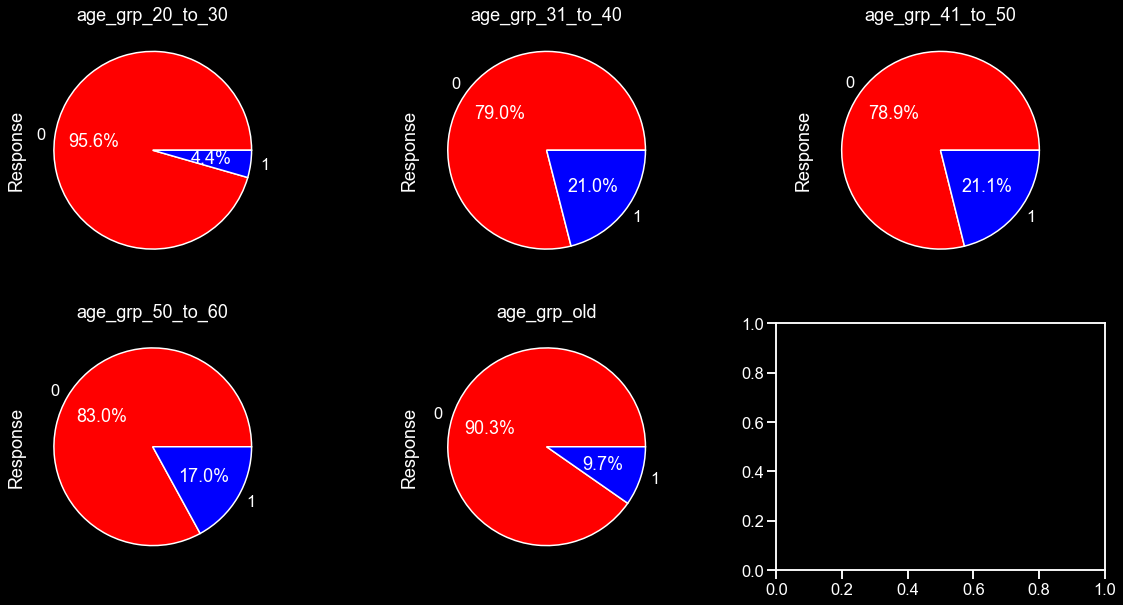

In [82]:
f,ax = plt.subplots(nrows=2, ncols=3, figsize = (20,10))
axx = ax.flatten()
for pos,tup in enumerate(age_grp_dict.items()):
    axx[pos].set_title(tup[0])
    data = tup[1]
    data['Response'].value_counts().plot.pie(autopct='%1.1f%%', ax = axx[pos],colors=['Red','Blue'])

#### Response with both 'Age' and 'Gender'

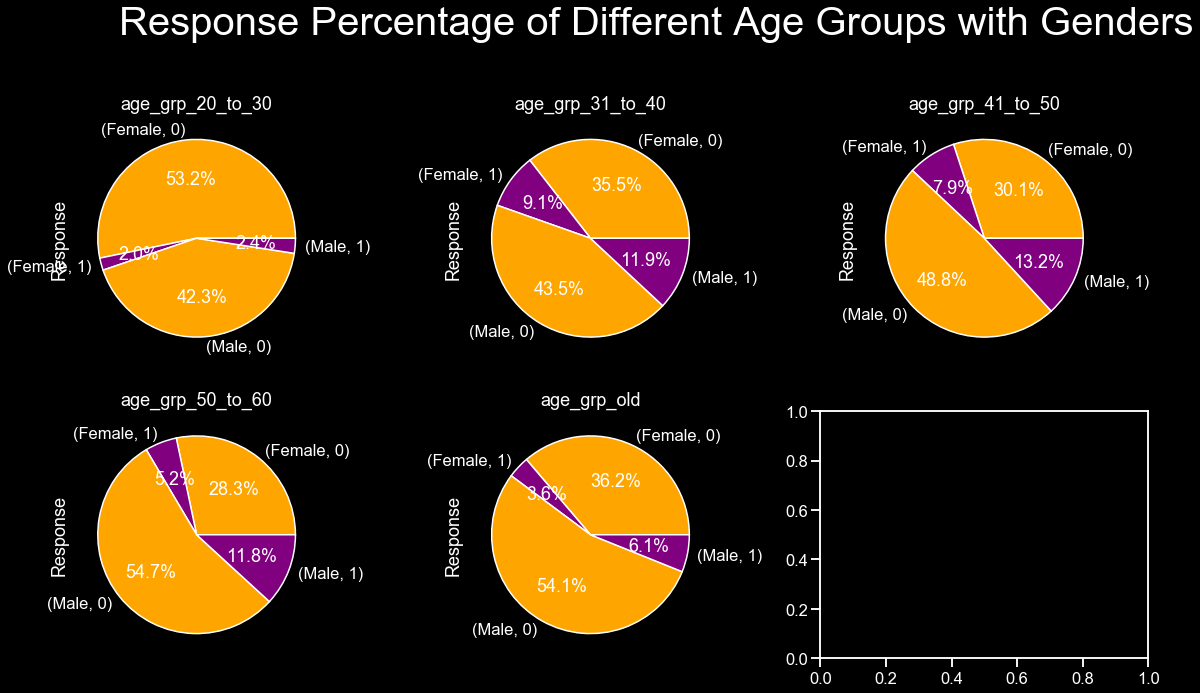

In [83]:
f,ax = plt.subplots(nrows=2, ncols=3, figsize = (20,10))
axx = ax.flatten()
plt.title('Response Percentage of Different Age Groups with Genders',fontsize=40,x=-0.5,y=2.5)
for pos,tup in enumerate(age_grp_dict.items()):
    axx[pos].set_title(tup[0])
    temp = tup[1]
    temp.groupby('Gender')['Response'].value_counts().plot.pie(autopct='%1.1f%%', ax = axx[pos],colors=['Orange','Purple'])

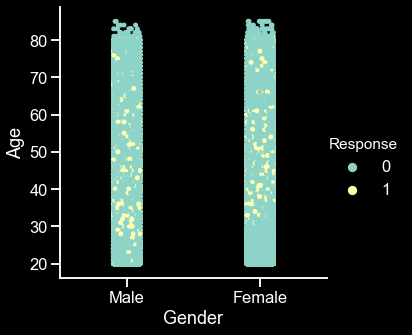

In [84]:
sns.catplot(x = 'Gender', y="Age",hue = 'Response', data=train)

## Insights:

1. Customers of age between 30 to 60 are more likely to buy insurance.
2. Customes of age between 20 to 30 are less likely to buy insurance.
3. In almost every age group, 'Male's are more likely to buy insurance.
4. Females under age 30 are very less likely ho buy insurance

---
## 3. `Driving_License`

In [85]:
train['Policy_Sales_Channel'].nunique(), data['Policy_Sales_Channel'].nunique()

(155, 130)

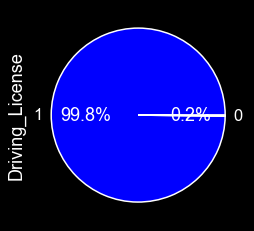

In [86]:
train['Driving_License'].value_counts().plot.pie(autopct='%1.1f%%',colors = ['Blue','Red'])

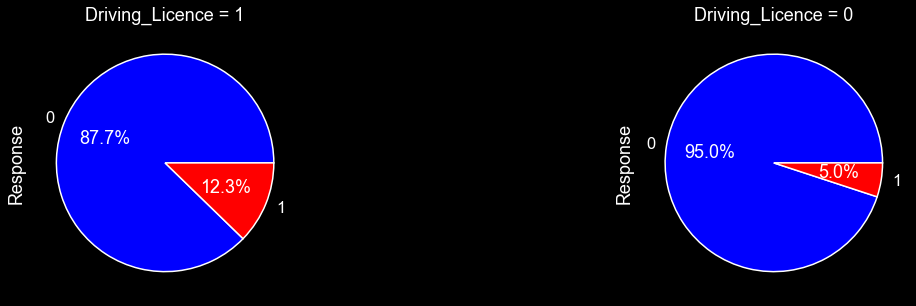

In [87]:
f,ax = plt.subplots(nrows=1,ncols=2,figsize = (20,5))
axx = ax.flatten()
#plt.title('Driving_License wise Response',fontsize=40,x=-0.5,y=2)
axx[0].set_title('Driving_Licence = 1')
axx[1].set_title('Driving_Licence = 0')
train[ train['Driving_License'] == 1]['Response'].value_counts().plot.pie(autopct='%1.1f%%',colors = ['Blue','Red'],ax=axx[0])
train[ train['Driving_License'] == 0]['Response'].value_counts().plot.pie(autopct='%1.1f%%',colors = ['Blue','Red'],ax=axx[1])

### Insights:

1. Very few customers don't have Driving License.
2. Customers with Driving License have higher chance of buying Insurance

---
## 4. `Region_Code`

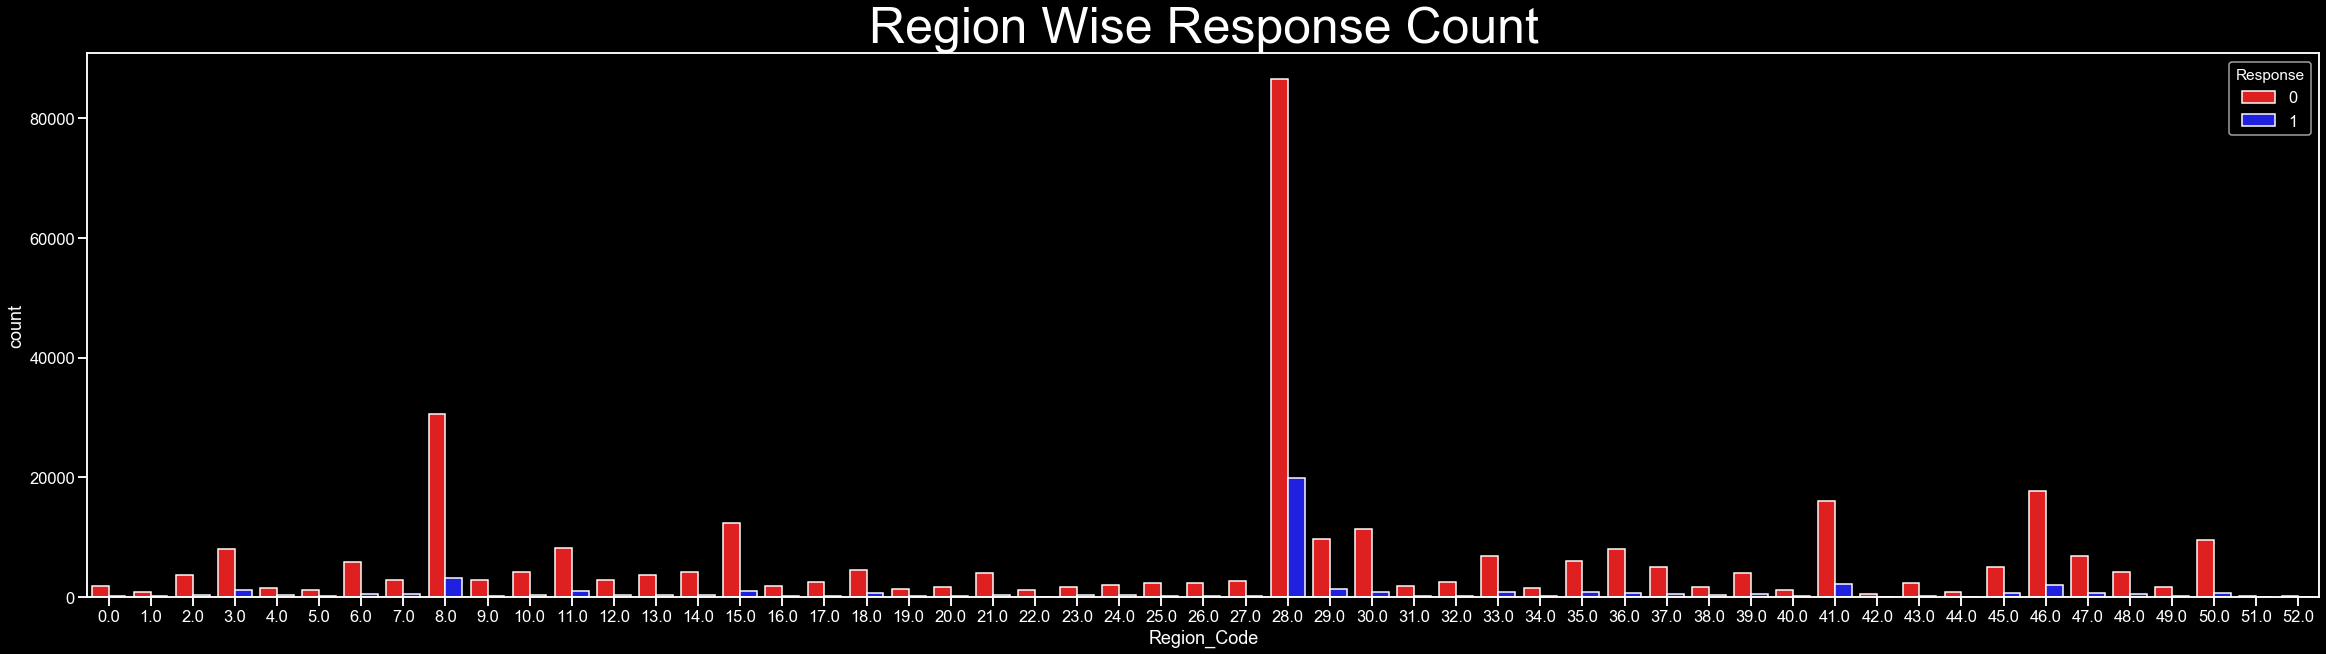

In [88]:
plt.figure(figsize = (40,10))
plt.title('Region Wise Response Count',fontsize=50)
sns.countplot(train['Region_Code'], hue = train['Response'],palette=['Red','Blue'])

In [89]:
u_region = train['Region_Code'].unique()
region_perc = {}
for i in u_region:
    total_region = train[ train['Region_Code'] == i].shape[0]
    buy_region = train[ (train['Region_Code'] == i) & train['Response'] == 1].shape[0]
    region_perc[i] = (buy_region/total_region)*100

In [90]:
region_perc = sorted(region_perc.items(), key=lambda x: x[1], reverse=True)
region_perc = list(zip(*region_perc))

In [91]:
region = np.array(region_perc[0])
region_perc = np.array(region_perc[1])
region = pd.DataFrame(region)
region_perc = pd.DataFrame(region_perc)

In [92]:
region_res_perc = pd.concat((region,region_perc), axis=1)
region_res_perc.columns = ['Region_Code', 'Buy_Percentage']

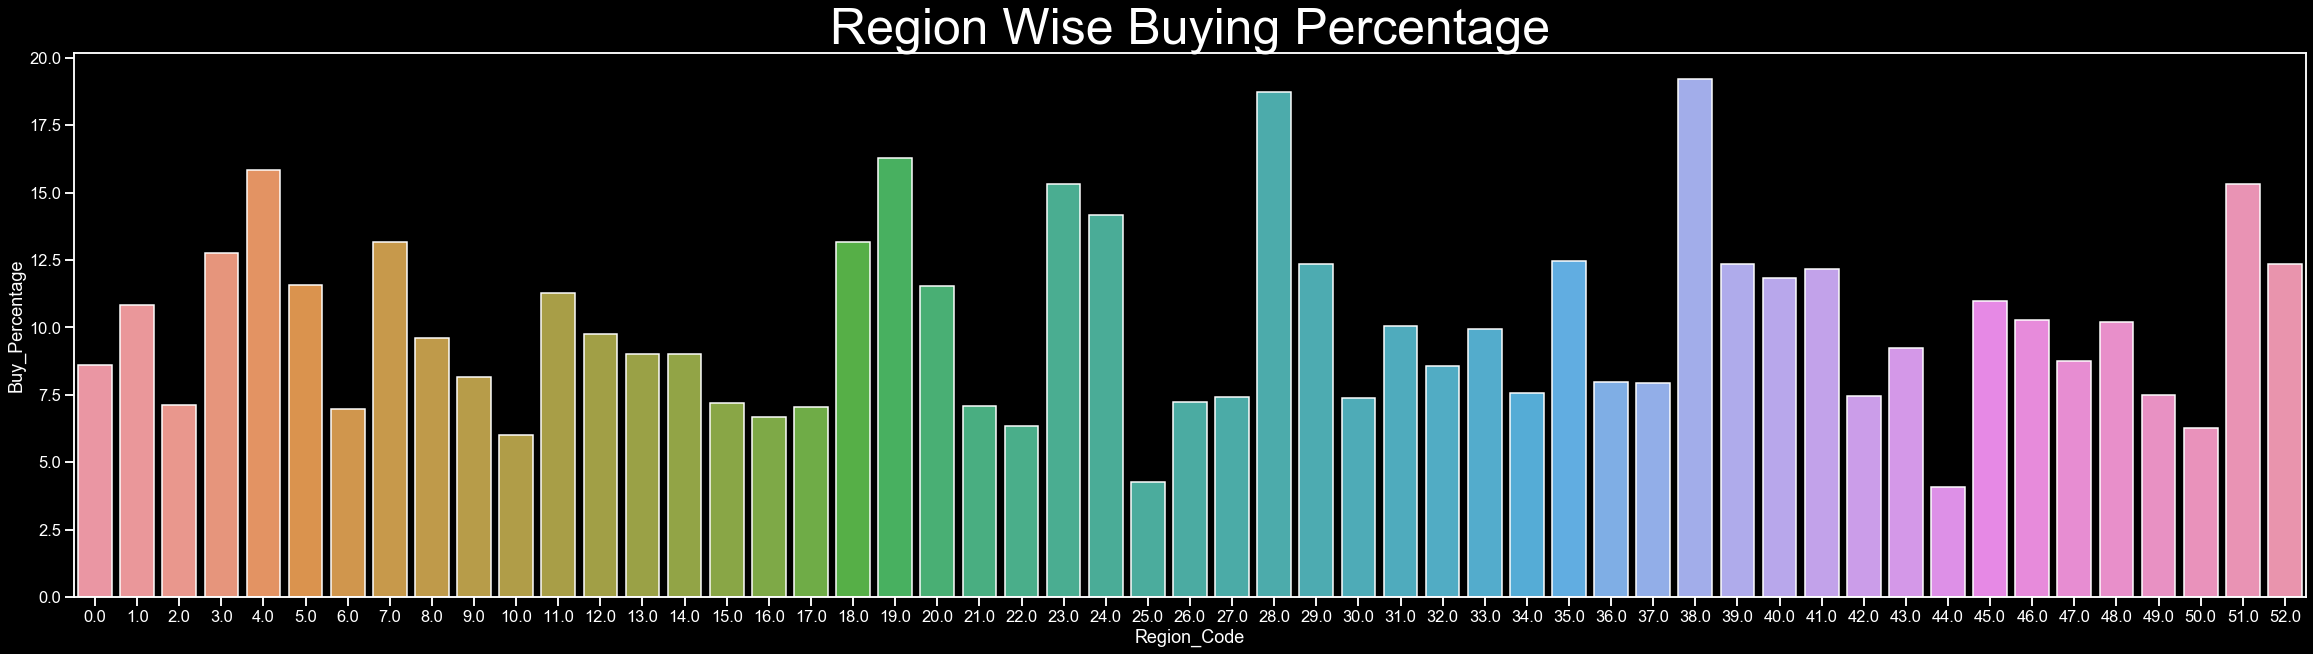

In [93]:
plt.figure(figsize=(40,10))
plt.title('Region Wise Buying Percentage',fontsize=50)
ax = sns.barplot(x = region_res_perc['Region_Code'], y = region_res_perc['Buy_Percentage'])

## Insights:

1. We have most of the customers from Region_Code : 28.
2. Region_Codes: [4,19,23,24,,28,38,51] have higher percentage of buying insurance.
3. Region_Codes: 25 and 44 have lower percentage of buying insurance.

---
## 5. `Previously_Insuaranced`

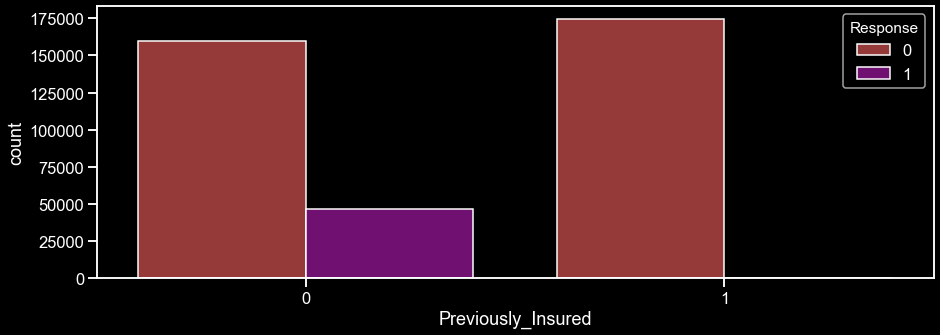

In [94]:
plt.figure(figsize=(15,5))
sns.countplot(train['Previously_Insured'],hue=train['Response'],palette=['Brown','Purple'])

In [95]:
train.groupby(['Previously_Insured', 'Gender'])['Response'].value_counts()

Previously_Insured  Gender  Response
0                   Female  0           68948
                            1           18123
                    Male    0           90981
                            1           28429
1                   Female  0           87887
                            1              62
                    Male    0           86583
                            1              96
Name: Response, dtype: int64

### Insights:

1. Customers who Previously_Insured are very likely to buy Insurnce now.
2. Customers who didn't Previously_Insured have good chance of buying Insurnce.

---
## 6. `Vehicle_Age`

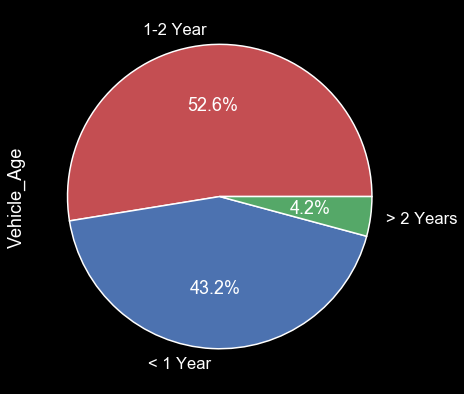

In [96]:
plt.figure(figsize=(7,7))
train['Vehicle_Age'].value_counts().plot.pie(autopct='%1.1f%%', colors = ['r', 'b', 'g'])

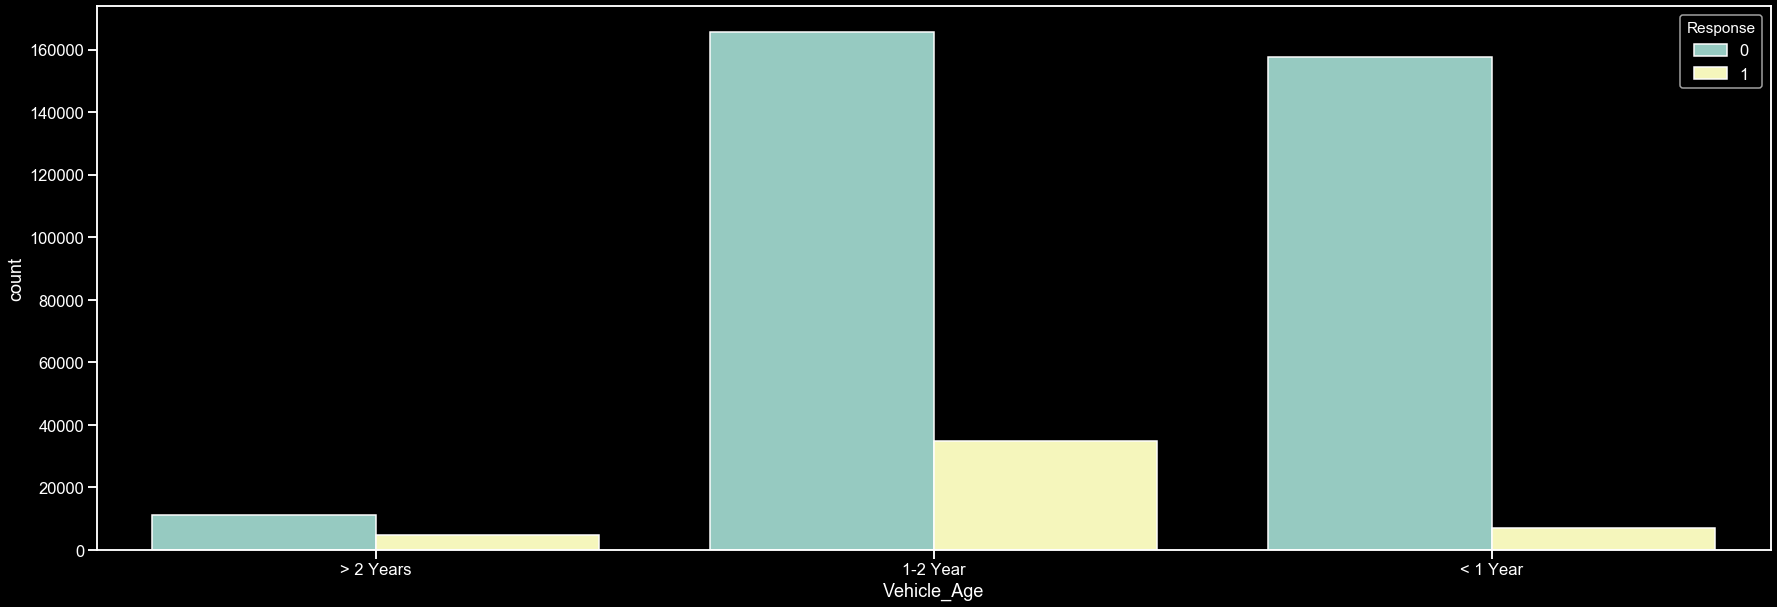

In [97]:
plt.figure(figsize = (30,10))
sns.countplot(train['Vehicle_Age'], hue = train['Response'])

In [98]:
ls = train['Vehicle_Age'].unique()

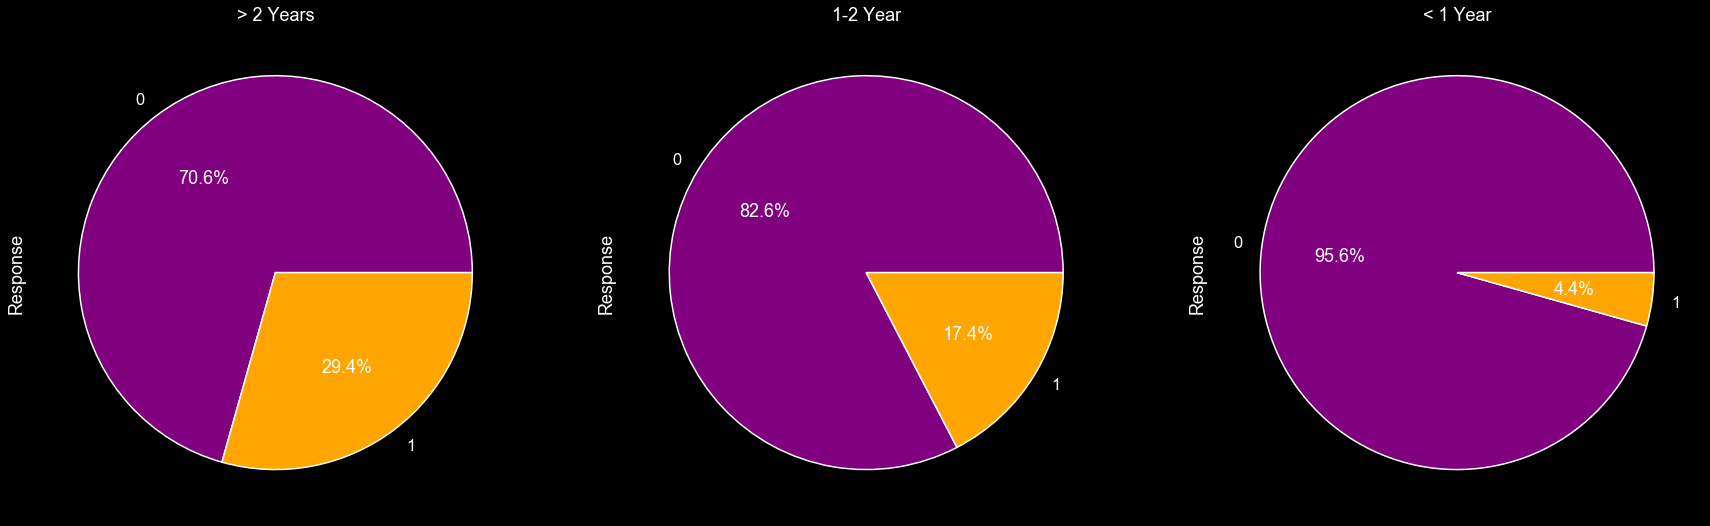

In [99]:
f,ax = plt.subplots(nrows=1, ncols=3,figsize = (30,10))
axx = ax.flatten()
for pos,val in enumerate(ls):
    axx[pos].set_title(str(val))
    train[ train['Vehicle_Age'] == val]['Response'].value_counts().plot.pie(autopct = '%1.1f%%',ax = axx[pos], colors=['Purple', 'Orange'])

# Insights :

1. We have half of our customers with Vehicle_Age `1-2 years`.
2. We have very few customers (4.2%) with Vehicle_Age `>2 years.
3. Customers with Vehicle_Age `>2years` have better chance (29.4%) of buying Insurance.
4. Customers with with Vehicle_Age `<1 years` have very less chance of buying Insurance.

---
## 7. `Vehicle_Damage`

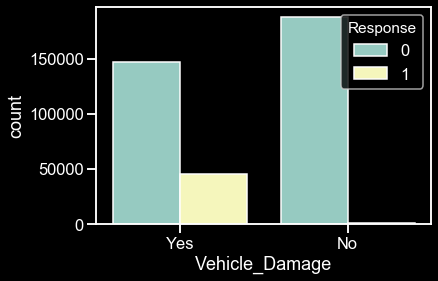

In [100]:
sns.countplot(train['Vehicle_Damage'], hue = train['Response'])

### Insights:

1. We have almost same number of customes with damaged and non_damaged vehicle.
2. Customers with Vehicle_Damage are likely to buy insurance.
3. Customers with non damaged vehicle have least chance (less than 1%) of buying insurance.

---
## 8. `Annual_Premium`

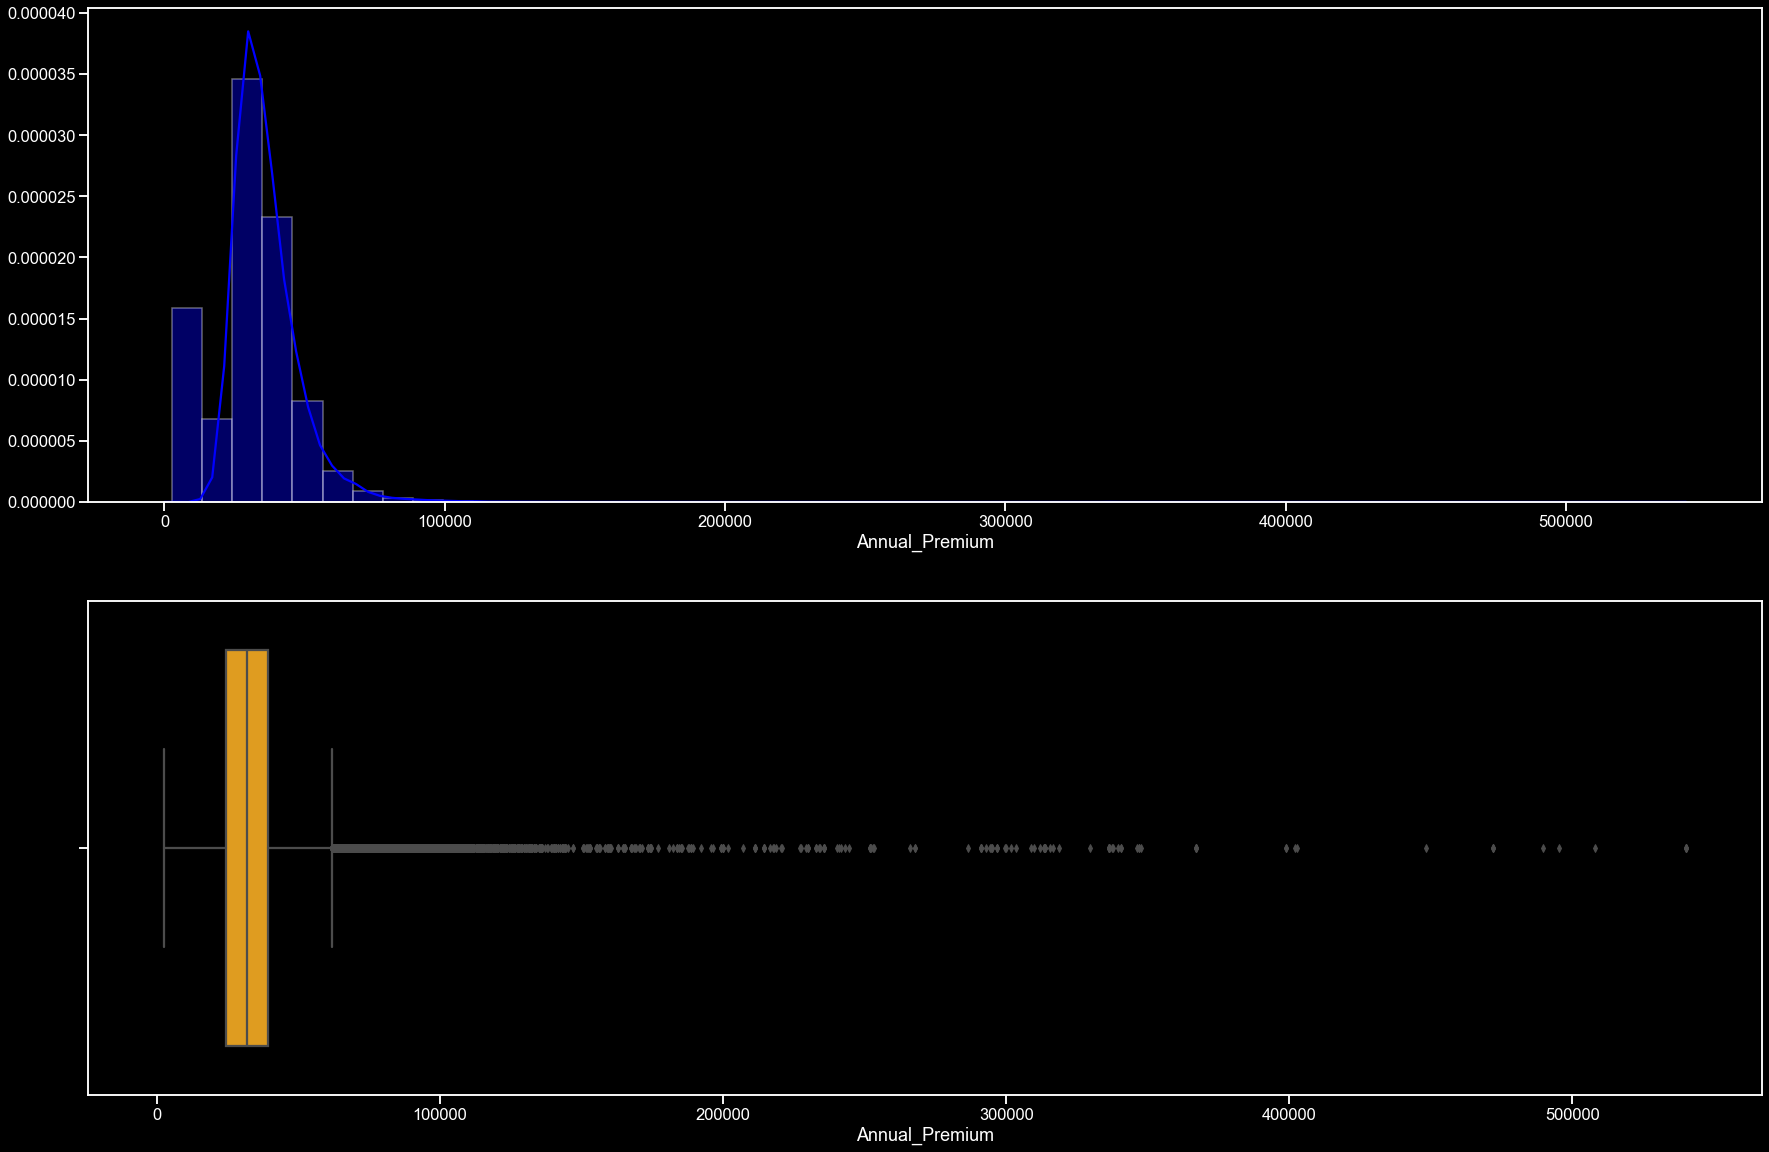

In [101]:
f,ax = plt.subplots(nrows=2,ncols=1,figsize=(30,20))
axx = ax.flatten()
#plt.figure(figsize=(30,10))
sns.distplot(train['Annual_Premium'],ax=axx[0], color='Blue')
sns.boxplot(train['Annual_Premium'],ax=axx[1],color='Orange')

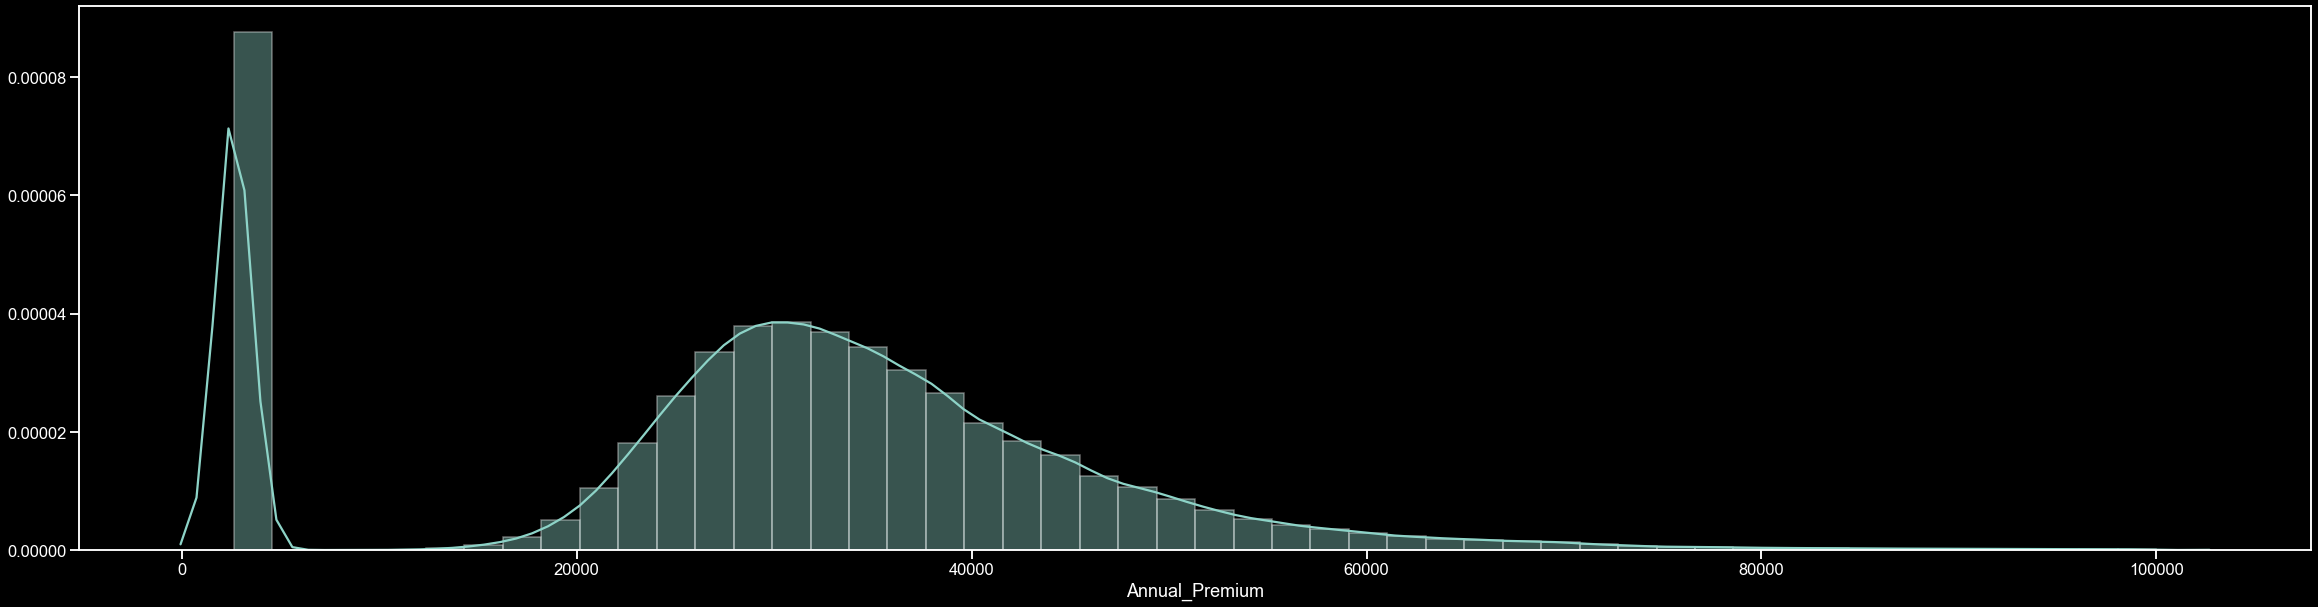

In [102]:
plt.figure(figsize=(40,10))
sns.distplot(train[ train['Annual_Premium'] < 100000]['Annual_Premium'])#.plot.hist(bins = 500, frequency=(0,10000))

In [103]:
train['Annual_Premium'].mean()

30564.389581458323

In [104]:
train['Annual_Premium'].median()

31669.0

In [105]:
start = 0
step = 10000
ls = []
for _ in range(10):
    ls.append((start,step))
    start = step
    step+=10000

In [106]:
for tup in ls:
    count = train[ train['Annual_Premium'].between(tup[0],tup[1])].shape[0]
    percentage = train[ (train['Annual_Premium'].between(tup[0], tup[1])) & (train['Response'] == 1)].shape[0]/train[ train['Annual_Premium'].between(tup[0], tup[1])].shape[0]*100
    print('Number of Customers with Annual_Premium Between {} : {} and Insurance Buy Percentage:{}'.format(tup,count,percentage))

Number of Customers with Annual_Premium Between (0, 10000) : 64882 and Insurance Buy Percentage:13.109953453962579
Number of Customers with Annual_Premium Between (10000, 20000) : 5803 and Insurance Buy Percentage:7.858004480441151
Number of Customers with Annual_Premium Between (20000, 30000) : 95393 and Insurance Buy Percentage:10.03742412965312
Number of Customers with Annual_Premium Between (30000, 40000) : 125062 and Insurance Buy Percentage:11.992451743935009
Number of Customers with Annual_Premium Between (40000, 50000) : 57793 and Insurance Buy Percentage:14.32699461872545
Number of Customers with Annual_Premium Between (50000, 60000) : 20050 and Insurance Buy Percentage:15.261845386533665
Number of Customers with Annual_Premium Between (60000, 70000) : 7271 and Insurance Buy Percentage:15.334892036858754
Number of Customers with Annual_Premium Between (70000, 80000) : 2524 and Insurance Buy Percentage:14.183835182250396
Number of Customers with Annual_Premium Between (80000, 9

In [107]:
print('Number of Customers with Annual_Premium greater than 100000 : {} and Insurance Buy Percentage:{}'.format(train[ train['Annual_Premium']>100000].shape[0], train[ (train['Annual_Premium'] > 100000) & (train['Response'] == 1)].shape[0]/train[ train['Annual_Premium']>100000].shape[0]))

Number of Customers with Annual_Premium greater than 100000 : 778 and Insurance Buy Percentage:0.15809768637532134


### Insights:

1. 'Annual Premium' data is highlt left skewed.
2. Most of the customers have "Annual_Premium' in range (0, 10000) and (20000 to 50000)
3. In every 'Annual Premium' range, the insurance buy percentage is almost same.

---
## 9. `Policy_Sales_Channel`

In [108]:
train['Policy_Sales_Channel'].nunique()

155

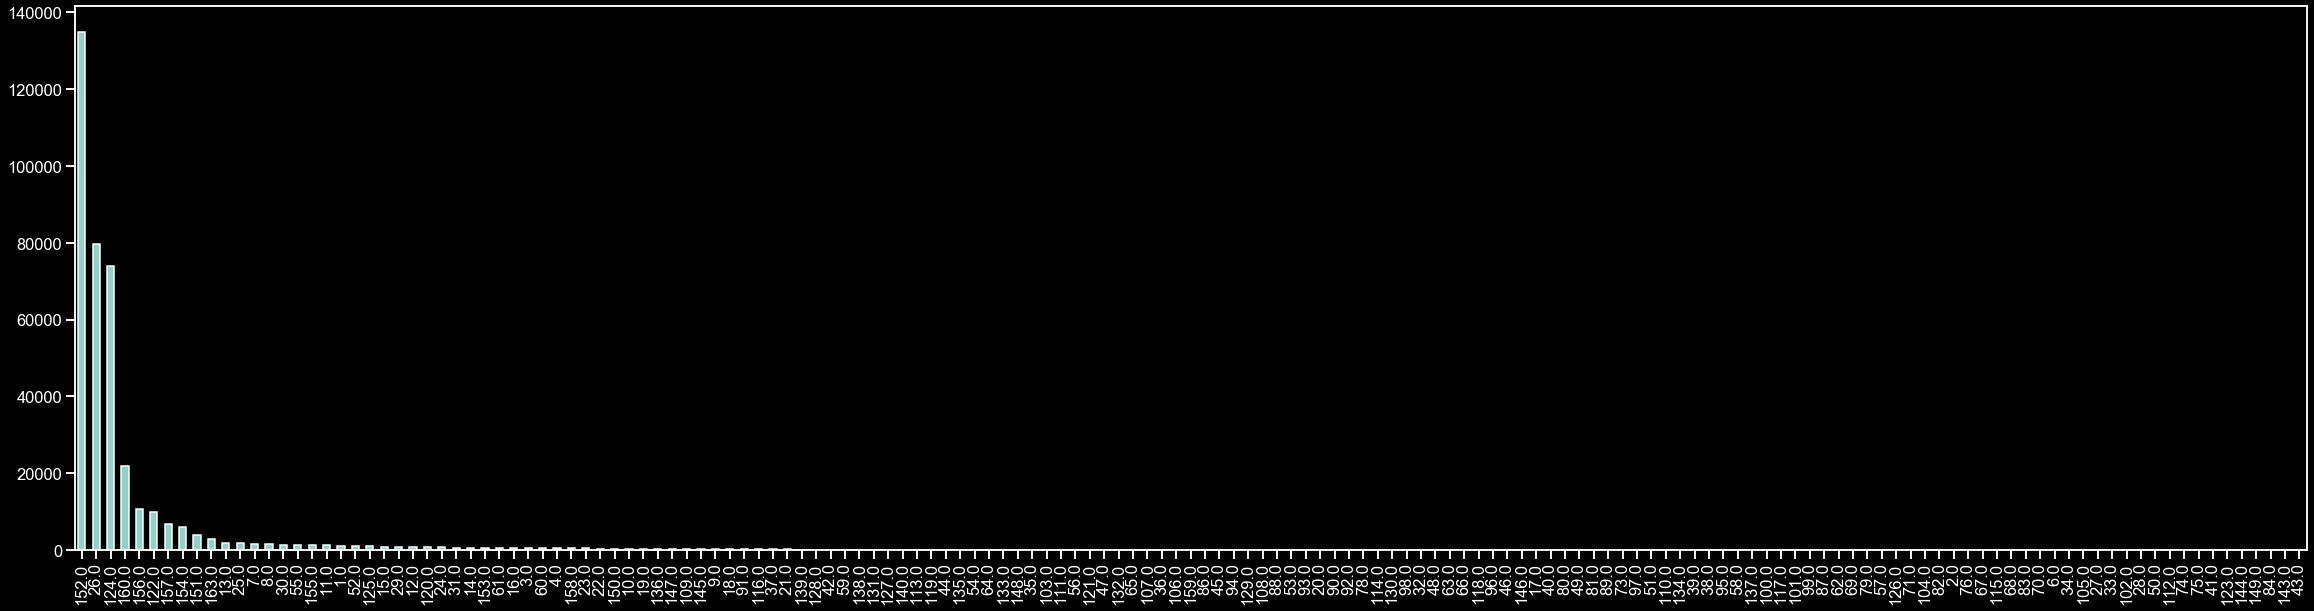

In [109]:
plt.figure(figsize=(40,10))
train['Policy_Sales_Channel'].value_counts().plot.bar()

### Insights:

1. Policy_Sales_Channel no. 152 have higest number of customers.
2. Policy_Sales_Channel no. [152,26,124,160,156,122,157,154,151,163] have most of the customers.

---
## 10. `Vintage`

In [117]:
train["Vintage"].nunique()

290

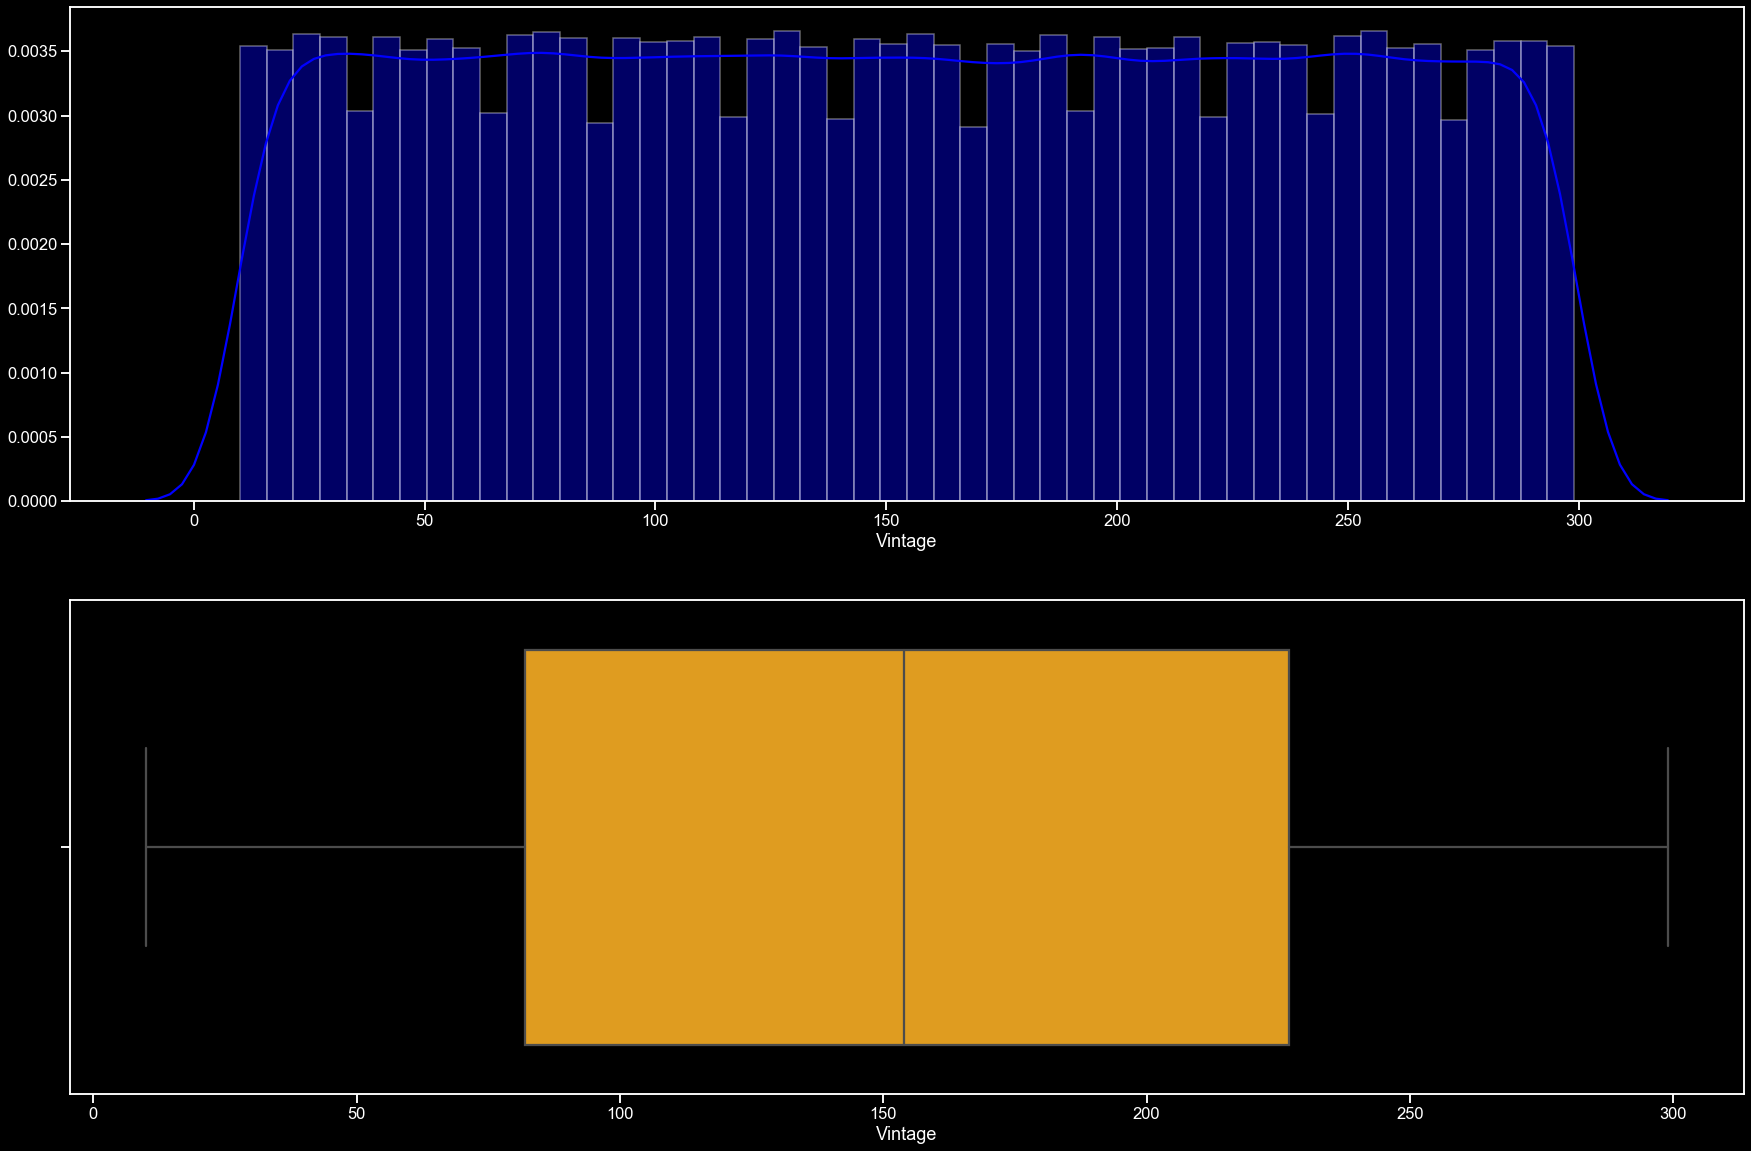

In [118]:
f,ax = plt.subplots(nrows=2,ncols=1,figsize=(30,20))
axx = ax.flatten()
sns.distplot(train['Vintage'],ax=axx[0], color='Blue')
sns.boxplot(train['Vintage'],ax=axx[1],color='Orange')

### Insights:

1. Every 'Vintage' value have almost same number of customers.

---
# All Insights From Variable Analysis.

1. Customers of age between 30 to 60 are more likely to buy insurance.
2. Customes of age between 20 to 30 are less likely to buy insurance.
3. In almost every age group, 'Male's are more likely to buy insurance.
4. Females under age 30 are very less likely ho buy insurance.
5. Very few customers don't have Driving License.
6. Customers with Driving License have higher chance of buying Insurance.
7. We have most of the customers from Region_Code : 28.
8. Region_Codes: [4,19,23,24,,28,38,51] have higher percentage of buying insurance.
9. Region_Codes: 25 and 44 have lower percentage of buying insurance.
10. Customers who Previously_Insured are very likely to buy Insurnce now.
11. Customers who didn't Previously_Insured have good chance of buying Insurnce.
12. We have half of our customers with Vehicle_Age 1-2 years.
13. We have very few customers (4.2%) with Vehicle_Age >2 years.
14. Customers with Vehicle_Age >2years have better chance (29.4%) of buying Insurance.
15. Customers with with Vehicle_Age <1 years have very less chance of buying Insurance.
16. We have almost same number of customes with damaged and non_damaged vehicle.
17. Customers with Vehicle_Damage are likely to buy insurance.
18. Customers with non damaged vehicle have least chance (less than 1%) of buying insurance.
19. 'Annual Premium' data is highlt left skewed.
20. Most of the customers have "Annual_Premium' in range (0, 10000) and (20000 to 50000)
21. In every 'Annual Premium' range, the insurance buy percentage is almost same.
22. Policy_Sales_Channel no. 152 have higest number of customers.
23. Policy_Sales_Channel no. [152,26,124,160,156,122,157,154,151,163] have most of the customers.
24. Every 'Vintage' value have almost same number of customers.



---
## Merging Train and Test Data

In [119]:
train['is_train'] = 1
test['is_train'] = 0
test['Response'] = None

In [120]:
data = pd.concat((train,test))
data.set_index('id',inplace=True)
data.shape

(508146, 12)

---
# Outlier Analysis

In [121]:
data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,is_train
id,,,,,,,,,,,,
1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,17,217,1,1
2,Male,76,1,3.0,0,1-2 Year,No,33536.0,17,183,0,1
3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,17,27,1,1
4,Male,21,1,11.0,1,< 1 Year,No,28619.0,31,203,0,1
5,Female,29,1,41.0,1,< 1 Year,No,27496.0,31,39,0,1


## `Age`

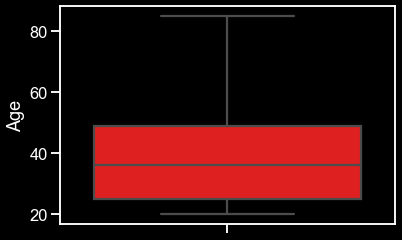

In [122]:
sns.boxplot('Age', data=data, orient='v', color='Red')

## `Annual_Premium`

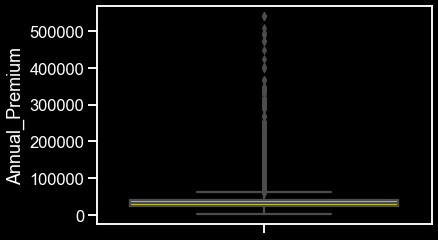

In [123]:
sns.boxplot('Annual_Premium', data=data,orient='v', color='Yellow')

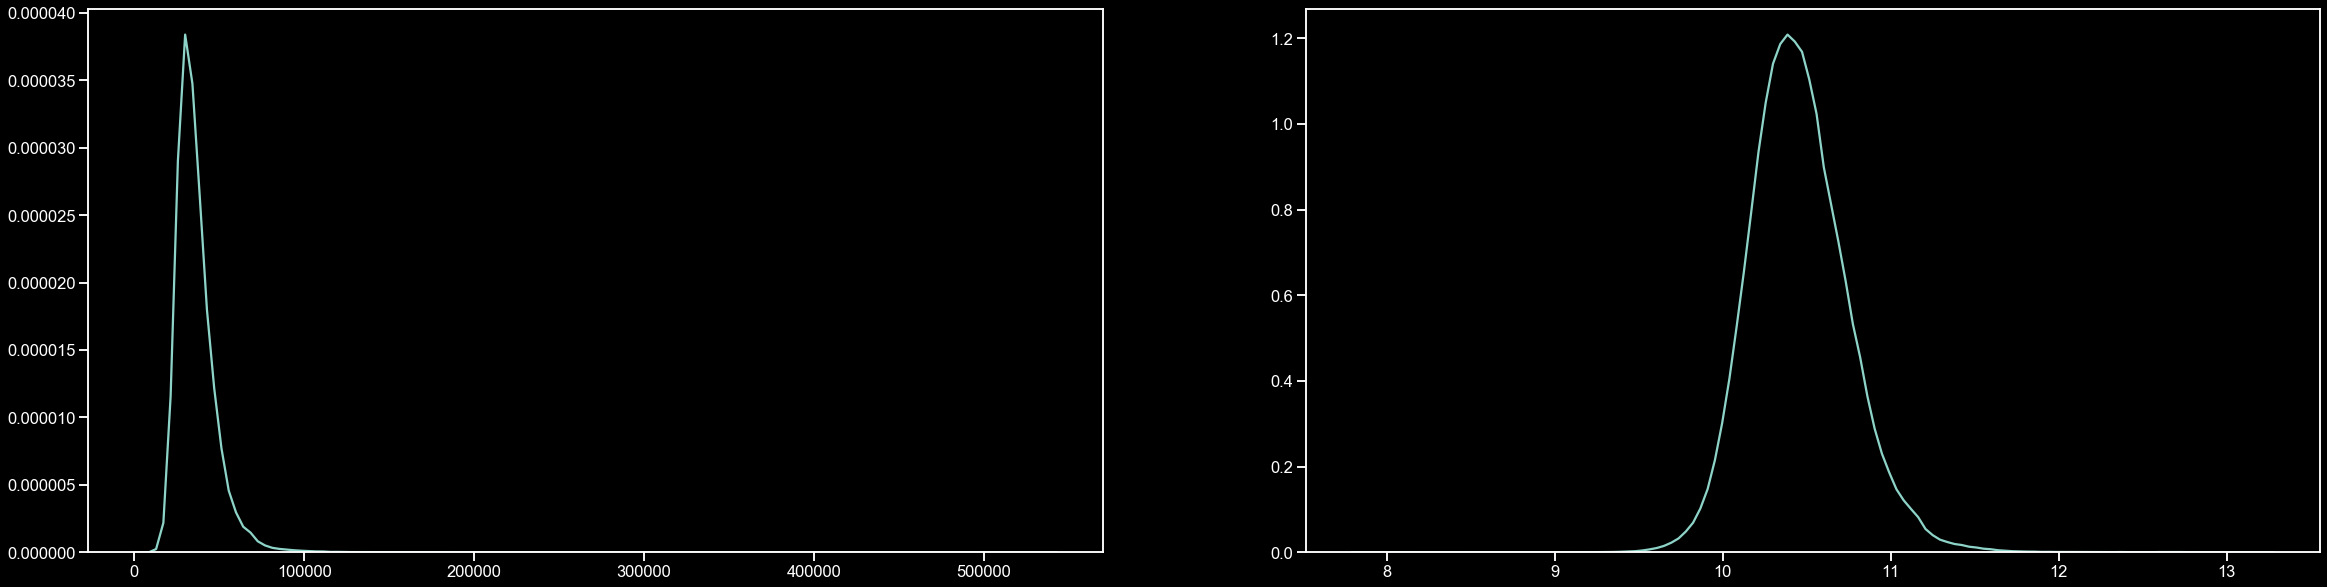

In [124]:
f,ax = plt.subplots(nrows=1,ncols=2,figsize = (40,10))
axx = ax.flatten()
sns.kdeplot(data['Annual_Premium'], legend=False,ax = axx[0])
sns.kdeplot(np.log(data['Annual_Premium']), legend=False,ax = axx[1])

### we will do log transformation on 'Annual_Premium'

In [125]:
data['Annual_Premium'] = np.log(data['Annual_Premium'])

---
# Corelation Analysis

### Label Encoding columns for co-relation checking

In [126]:
corr_check = data.copy()

In [127]:
col_ls = ['Gender', 'Vehicle_Age', 'Vehicle_Damage']

for col in col_ls:
    corr_check[col] = le.fit_transform(corr_check[col])

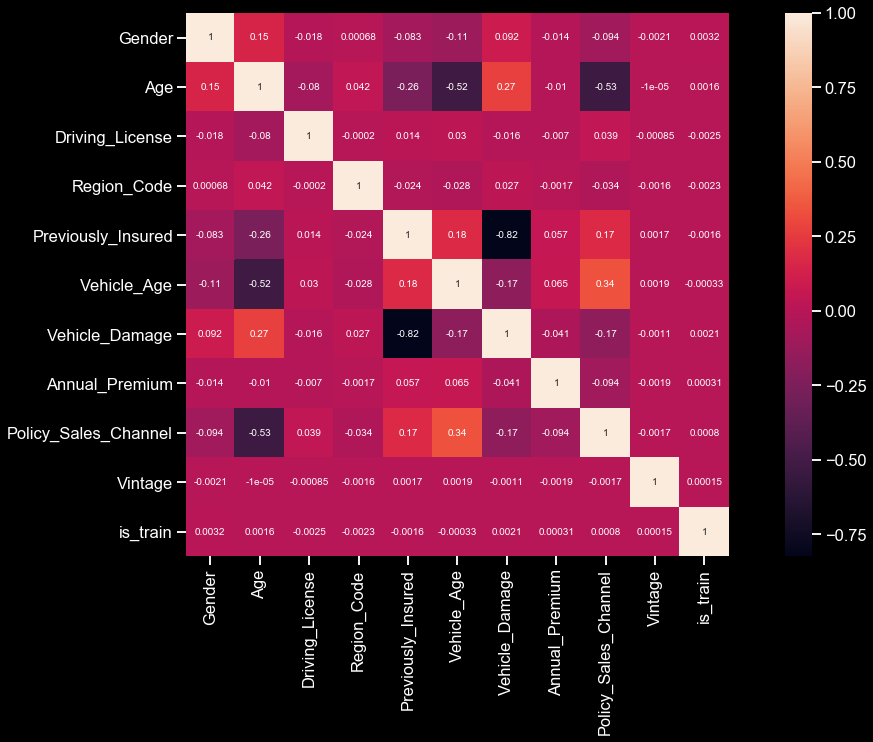

In [128]:
plt.figure(figsize=(20,10))
sns.heatmap(corr_check.corr(), annot=True, square=True,annot_kws={'size': 10})

## Insights: 

1. 'Previously_Insured'  and 'Vehicle_Damage' are highly positively corelated.
2. 'Age' and 'Policy_Sales_Channel' are negatively corelated.
3. 'Age' and 'Vehicle_Age' are negatively corelated.